## Init and Run GMM

In [1]:
%%javascript
Jupyter.utils.load_extensions('tdb_ext/main')

<IPython.core.display.Javascript object>

In [2]:
#this sets the backend to jupyter/ipython that (i think) displays
#     images directly. anyway, it prevents the matplotlib framework
#     python error that is my least favorite thing eeeevvvveeeer.
%matplotlib notebook

import sys
sys.path.append("..")

import gmix_model as gmix
import numpy as np
import tdb as tdb
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import gmix_sample_mixture as smpl

import os
os.chdir('/Users/azane/GitRepo/spider')

In [3]:
#read in training and test data
s_x, s_t = gmix.get_xt_from_npz('data/spi_gmix_train.npz', True)
t_x, t_t = gmix.get_xt_from_npz('data/spi_gmix_test.npz', True)

In [4]:
#create gmm with data
gmm = gmix.GaussianMixtureModel(s_x, s_t, t_x, t_t,
                               numGaussianComponents=5, hiddenLayerSize=10,
                               learningRate=0.001)

In [9]:
%%capture
#d will be a dictionary of evaluated tensors under their standard name.
runTimes = 1000
reports = 1
assert reports>=1

d = gmm.train(iterations=runTimes, testBatchSize=1000,
          trainBatchSize=5000, reportEvery=int(runTimes/reports))


## Debugging

In [6]:
def init4d(x, y):
    assert y.ndim == 1
    assert x.ndim == 2
    assert x.shape[0] == 3
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') #create subplot in figure.
    
    #set the color map to the output dimension.
    scatPlot = ax.scatter(x[0], x[1], x[2], c=y) #create plot
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    #add colorbar label
    cb = fig.colorbar(scatPlot)
    cb.set_label("y")
    
    return fig, scatPlot

<IPython.core.display.Javascript object>


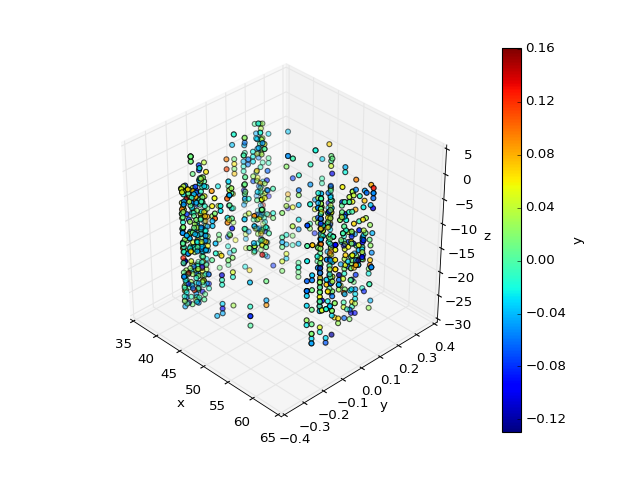

(<matplotlib.figure.Figure at 0x117db04d0>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x115902690>)

In [15]:
m, v, u = gmm.get_xmvu()
x, y = smpl.sample_mixture(t_x, m, v, u) #set to gmm sample
#x = t_x; y = t_t #set to actual values

#cull data to a set number of points.
lim = 1000
if x.shape[0] > lim:
    randRows = np.random.randint(x.shape[0],size=lim)
    x = x[randRows]
    y = y[randRows]

init4d(np.squeeze(x.transpose()), np.squeeze(y[:,0]))

In [8]:
#%%capture
print 'calc_agg_grad_w1'
print d['calc_agg_grad_w1']
print 'calc_agg_grad_b1'
print d['calc_agg_grad_b1']
print 'calc_agg_grad_w2'
print d['calc_agg_grad_w2']
print 'calc_agg_grad_b2'
print d['calc_agg_grad_b2']
print 'calc_agg_grad_w3'
print d['calc_agg_grad_w3']
print 'calc_agg_grad_b3'
print d['calc_agg_grad_b3']

calc_agg_grad_w1
[[ -4.40599706e-06  -1.97984286e-06  -1.48844003e-06  -2.47997855e-06
   -2.76957799e-08   5.16233683e-07  -3.96381466e-07   1.41658973e-06
   -9.67132578e-08   5.76113734e-07]
 [ -3.03580077e-06  -1.08792517e-06  -1.10299538e-06  -1.48461851e-07
   -7.17529758e-07  -7.85640680e-07   2.94202156e-08   1.24892586e-06
    4.36478217e-07   5.50436084e-07]
 [  7.72519525e-06   2.44233320e-06   2.71375620e-06   3.79929452e-06
   -4.65795807e-07   4.60650483e-07  -1.97579698e-06  -1.13425267e-06
    5.97043311e-07   4.53680599e-07]]
calc_agg_grad_b1
[ -1.85099998e-06  -5.79758193e-07  -9.68010113e-07   3.35650896e-07
  -1.04431558e-06  -1.38748146e-06   1.90272817e-06  -6.41440920e-07
   1.21994742e-06   2.32360989e-07]
calc_agg_grad_w2
[[ -6.68610312e-07   1.70972180e-06   3.14212798e-07  -1.68924316e-06
    2.34036156e-06  -8.08935567e-07   2.14725401e-06  -2.03532267e-08
    1.49354389e-06  -1.02630281e-06]
 [  6.94809387e-07  -7.12867063e-07  -2.82736465e-07   2.18227640e